## Cargar libreria alr4

In [2]:
library(alr4)

Loading required package: car

Loading required package: carData

Loading required package: effects

lattice theme set by effectsTheme()
See ?effectsTheme for details.



## Visualizar primeras lineas de la base de datos Forbes

In [3]:
head(Forbes)

,bp,pres,lpres
,<dbl>,<dbl>,<dbl>
1,194.5,20.79,131.79
2,194.3,20.79,131.79
3,197.9,22.40,135.02
4,198.4,22.67,135.55
5,199.4,23.15,136.46
6,199.9,23.35,136.83


## Obtener variables de la base de datos Forbes

In [4]:
temp.ebullicion <- Forbes$bp

presion <- Forbes$pres

## Graficar

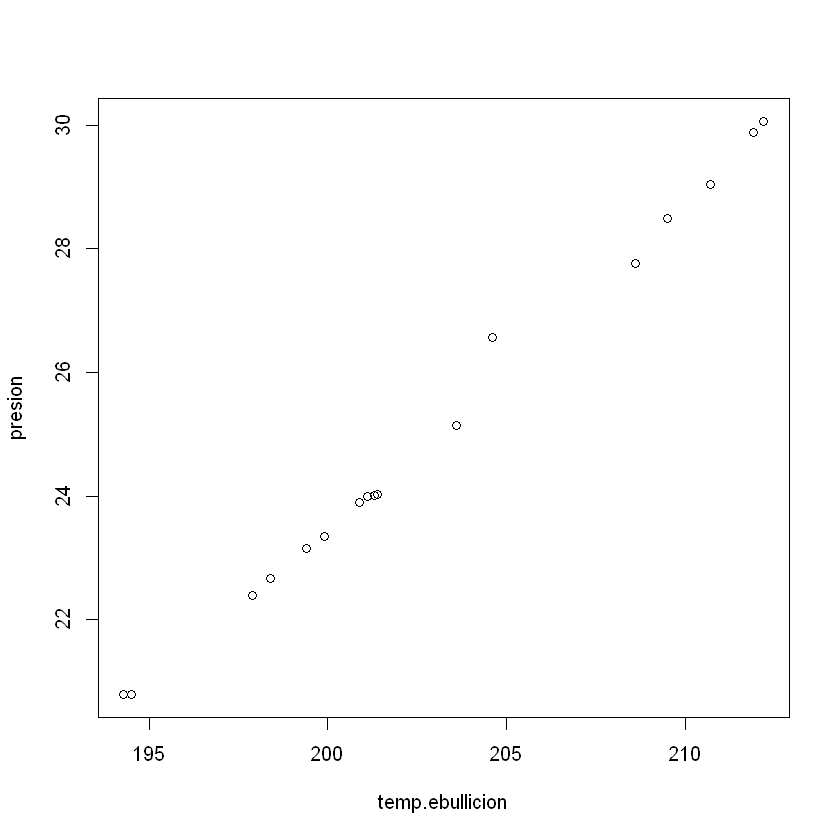

In [5]:
plot(temp.ebullicion, presion)

## Ejecutar la regresion de presion sobre temp.ebullicion

In [6]:
Forbes.regresion <- lm(presion ~ temp.ebullicion)

## Coeficientes estimados

In [7]:
coef(Forbes.regresion)

(Intercept) temp.ebullicion 
    -81.0637271       0.5228924

## Informacion del modelo ajustado

In [8]:
summary(Forbes.regresion)


Call:
lm(formula = presion ~ temp.ebullicion)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25717 -0.11246 -0.05102  0.14283  0.64994 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -81.06373    2.05182  -39.51   <2e-16 ***
temp.ebullicion   0.52289    0.01011   51.74   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2328 on 15 degrees of freedom
Multiple R-squared:  0.9944,	Adjusted R-squared:  0.9941 
F-statistic:  2677 on 1 and 15 DF,  p-value: < 2.2e-16


## Valores ajustados

In [9]:
pres.estim <- fitted.values(Forbes.regresion)

## Residuos

In [10]:
residuals(Forbes.regresion)

1            2            3            4            5            6 
 0.151155176  0.255733656 -0.016678987 -0.008125187 -0.051017588 -0.112463788 
           7            8            9           10           11           12 
-0.095356189 -0.099934669 -0.226802389 -0.184513149 -0.257165671  0.649941928 
          13           14           15           16           17 
 0.007769164 -0.251627675 -0.069701717  0.142827402  0.165959682

## Grafica de temp.ebullicion vs valores ajustados

In [11]:
lines(temp.ebullicion,pres.estim)

plot(temp.ebullicion,pres.estim)
lines(temp.ebullicion,pres.estim)

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


## Otra opcion para usar la base de datos Forbes sin necesidad de extraer las variables


Call:
lm(formula = pres ~ bp, data = Forbes)

Coefficients:
(Intercept)           bp  
   -81.0637       0.5229  


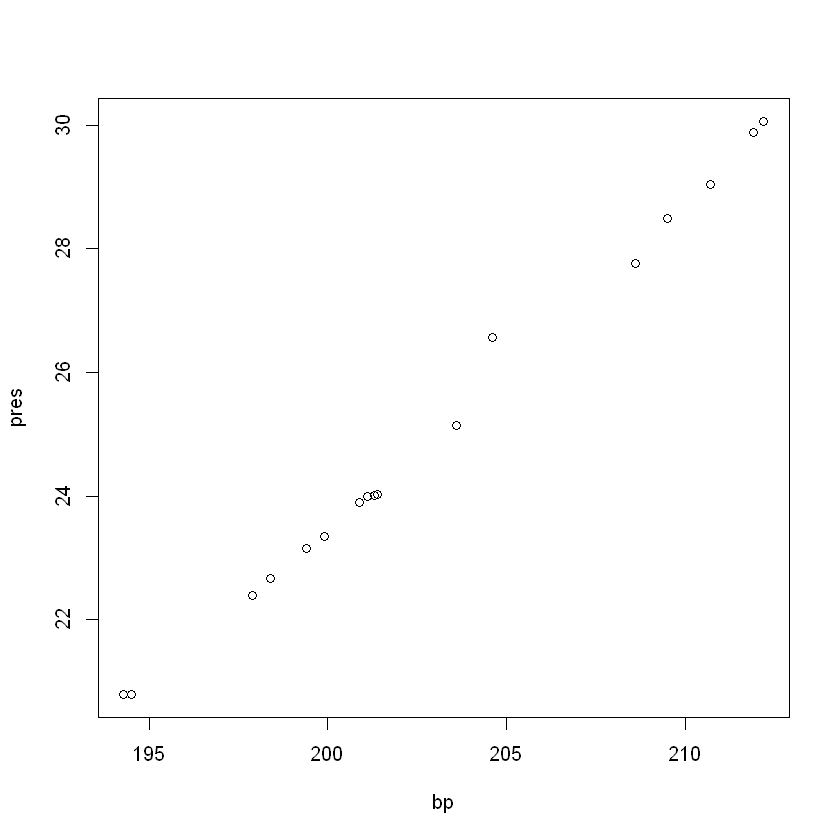

In [12]:
with(Forbes, plot(bp,pres) )

lm(pres ~ bp, data=Forbes)

## Accesando los datos desde un archivo excel


Call:
lm(formula = pres ~ bp, data = Forbes.datos)

Coefficients:
(Intercept)           bp  
   -81.0637       0.5229  


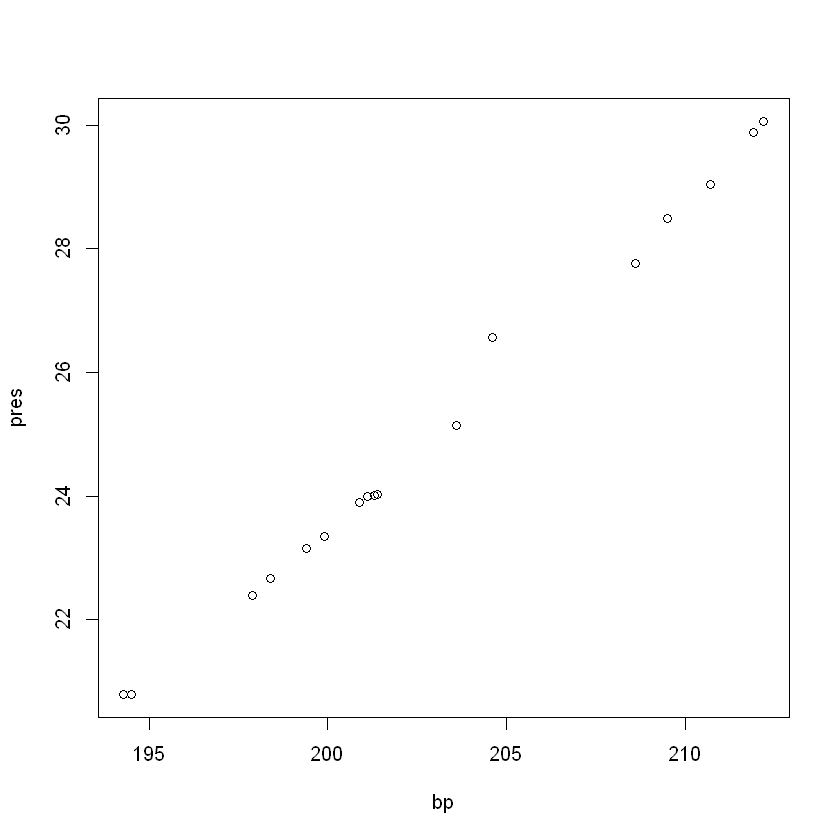

In [13]:
Forbes.datos <- read.csv("Forbes (1).csv", header=TRUE)

with(Forbes.datos, plot(bp,pres) )

lm(pres ~ bp, data=Forbes.datos)

# Modelo centrado

In [14]:
temp.ebu.centrada <- temp.ebullicion - mean(temp.ebullicion)


Forbes.regresion.centrada <- lm(presion ~ temp.ebu.centrada)

coef(Forbes.regresion.centrada)

(Intercept) temp.ebu.centrada 
       25.0588235         0.5228924

# Datos de estaturas de madres e hijas

,mheight,dheight
,<dbl>,<dbl>
1,59.7,55.1
2,58.2,56.5
3,60.6,56.0
4,60.7,56.8
5,61.8,56.0
6,55.5,57.9


mheight 
1.020108

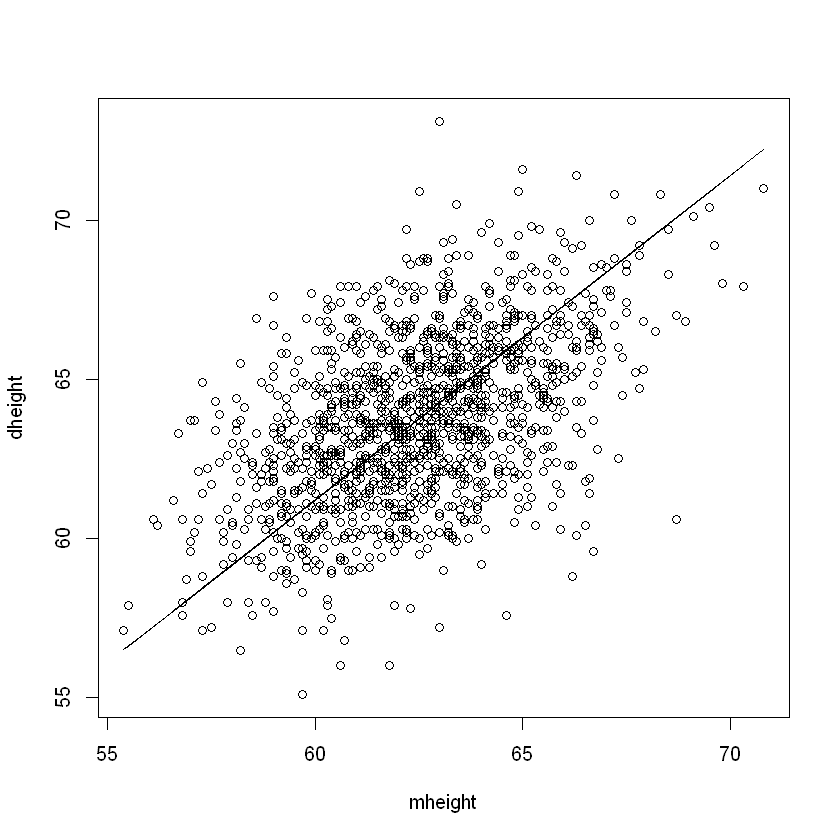

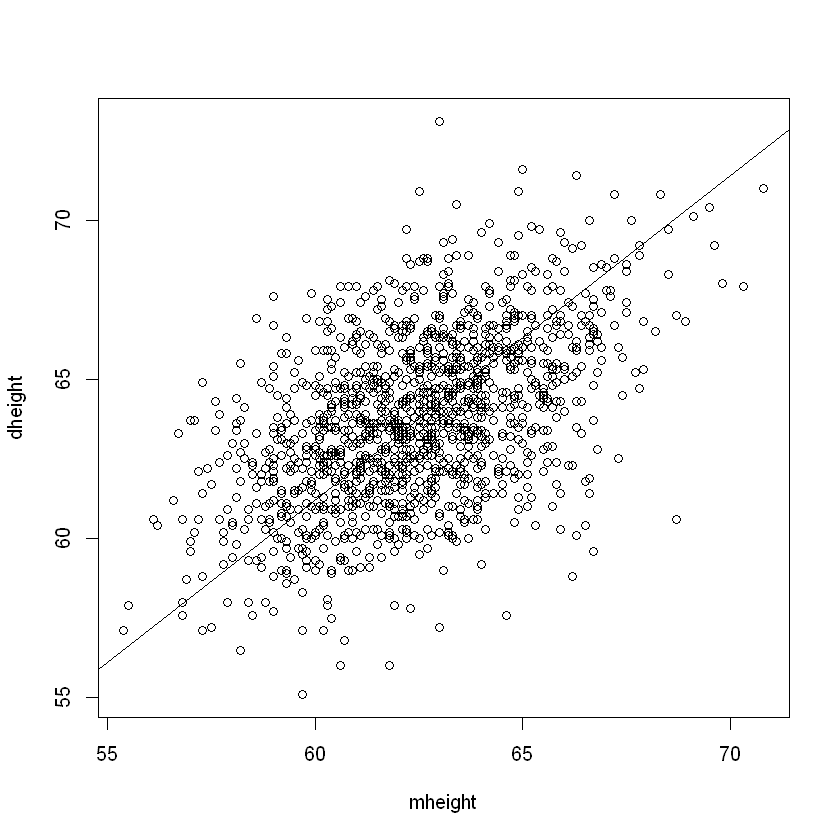

In [15]:
head(Heights)

with(Heights, plot(mheight,dheight))

estatura <- lm(dheight ~ mheight -1, data=Heights)

coefficients(estatura)

with( Heights, lines(mheight,fitted.values(estatura) ) )

with(Heights, plot(mheight,dheight))

abline(estatura)

# Valores ajustados con intervalos de confianza de las medias condicionales y de observaciones futuras 

## Sin ajuste de Scheffe

In [16]:
est.media <- predict(estatura,interval="confidence")
pred.resp <- predict(estatura,interval="prediction")

sigma.est <- summary(estatura)$sigma

Warning message in predict.lm(estatura, interval = "prediction"):
"predictions on current data refer to _future_ responses
"


## Con ajuste de Scheffe

In [17]:
est.media[,3] <- est.media[,1]+sigma.est*sqrt(hatvalues(estatura))*sqrt(1*qf(.95,df1=1,df2=1374))
est.media[,2] <- est.media[,1]-sigma.est*sqrt(hatvalues(estatura))*sqrt(1*qf(.95,df1=1,df2=1374))

pred.resp[,3] <- pred.resp[,1]+sigma.est*sqrt(1+hatvalues(estatura))*sqrt(1*qf(.95,df1=1,df2=1374))
pred.resp[,2] <- pred.resp[,1]-sigma.est*sqrt(1+hatvalues(estatura))*sqrt(1*qf(.95,df1=1,df2=1374))

with(Heights, lines(mheight,est.media[,3], col="red") )
with(Heights, lines(mheight,est.media[,2], col="red") )

with(Heights, lines(mheight,pred.resp[,3], col="green") )
with(Heights, lines(mheight,pred.resp[,2], col="green") )

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet
